In [1]:
## import lib ##
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
import time

from sklearn.neighbors import KDTree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

from scipy import spatial

In [2]:
## Load csv ##
wine = pd.DataFrame.from_csv("winequality-white.csv", sep = ";", index_col=None)

print("Length:",len(wine))
wine.head()

Length: 4898


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
wine_win = wine.drop('quality',1)
type(wine_win)
wine_win.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [4]:
wine_wi = (wine_win - wine_win.min())/(wine_win.max() - wine_win.min())

In [5]:
wine_wi.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452


In [6]:
print(wine_wi.max(),wine_wi.min())

fixed acidity           1.0
volatile acidity        1.0
citric acid             1.0
residual sugar          1.0
chlorides               1.0
free sulfur dioxide     1.0
total sulfur dioxide    1.0
density                 1.0
pH                      1.0
sulphates               1.0
alcohol                 1.0
dtype: float64 fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
dtype: float64


In [7]:
wine_np_X = wine_wi.as_matrix()
print(len(wine_np_X))
wine_np_X

4898


array([[ 0.30769231,  0.18627451,  0.21686747, ...,  0.25454545,
         0.26744186,  0.12903226],
       [ 0.24038462,  0.21568627,  0.20481928, ...,  0.52727273,
         0.31395349,  0.24193548],
       [ 0.41346154,  0.19607843,  0.24096386, ...,  0.49090909,
         0.25581395,  0.33870968],
       ..., 
       [ 0.25961538,  0.15686275,  0.11445783, ...,  0.24545455,
         0.27906977,  0.22580645],
       [ 0.16346154,  0.20588235,  0.18072289, ...,  0.56363636,
         0.18604651,  0.77419355],
       [ 0.21153846,  0.12745098,  0.22891566, ...,  0.49090909,
         0.11627907,  0.61290323]])

In [8]:
wine_np_y = wine['quality'].as_matrix()
wine_np_y

array([6, 6, 6, ..., 6, 7, 6])

In [9]:
np.random.seed(1943)
indices = np.random.permutation(len(wine_np_X))
n = int(0.9*len(wine_np_X))
wine_X_train = wine_np_X[indices[0:n]]
wine_y_train = wine_np_y[indices[0:n]]
wine_X_test = wine_np_X[indices[n:4898]]
wine_y_test = wine_np_y[indices[n:4898]]

In [10]:
len(wine_y_test)

490

In [11]:
len(wine_y_train)

4408

In [12]:
ngh = int(math.sqrt(4898))
ngh

69

In [13]:
def cosdist(x, y):
    #return np.sum(x*y)/np.sqrt(np.sum(x)**2 * np.sum(y)**2)
    return spatial.distance.cosine(x,y)

# kNN Define

In [14]:
## Linear Search ##
knn_LSman = KNeighborsClassifier(n_neighbors=ngh, algorithm='brute', metric='manhattan')
knn_LSelu = KNeighborsClassifier(n_neighbors=ngh, algorithm='brute', metric='euclidean')
knn_LScos = KNeighborsClassifier(n_neighbors=ngh, algorithm='brute', metric=cosdist)
## KDTree ##
knn_KDman = KNeighborsClassifier(n_neighbors=ngh, algorithm='kd_tree', metric='manhattan')
knn_KDelu = KNeighborsClassifier(n_neighbors=ngh, algorithm='kd_tree', metric='euclidean')
#knn_KDcos = KNeighborsClassifier(n_neighbors=ngh, algorithm='kd_tree', metric=cosdist)

# Linear Search

### kNN_LSman

In [15]:
## Linear Search manhattan 

s_time1 = time.time()
knn_LSman.fit(wine_X_train,wine_y_train)
e_time1 = time.time() - s_time1

s_time11 = time.time()
wine_y_pred = knn_LSman.predict(wine_X_test)
e_time11 = time.time() - s_time11
#print(np.unique(wine_y_test))
#print(np.unique(wine_y_pred))
print("Confusion Matrix: \n", confusion_matrix(wine_y_test, wine_y_pred, labels=[3,4,5,6,7,8,9]))
print("\nAccuracy: ",accuracy_score(wine_y_test, wine_y_pred))

Confusion Matrix: 
 [[  0   0   0   2   0   0   0]
 [  0   0   9   5   0   0   0]
 [  0   0  82  71   3   0   0]
 [  0   0  35 165  13   0   0]
 [  0   0   2  62  25   0   0]
 [  0   0   0  10   5   0   0]
 [  0   0   0   1   0   0   0]]

Accuracy:  0.555102040816


In [16]:
## Resubstitution Validation
knn_LSman.fit(wine_np_X,wine_np_y)
wine_y_pred = knn_LSman.predict(wine_X_test)
print("Confusion Matrix: \n", confusion_matrix(wine_y_test, wine_y_pred, labels=[3,4,5,6,7,8,9]))
print("\nAccuracy: ",accuracy_score(wine_y_test, wine_y_pred))

Confusion Matrix: 
 [[  0   0   0   2   0   0   0]
 [  0   0   9   5   0   0   0]
 [  0   0  86  68   2   0   0]
 [  0   0  31 172  10   0   0]
 [  0   0   1  61  27   0   0]
 [  0   0   0  10   5   0   0]
 [  0   0   0   1   0   0   0]]

Accuracy:  0.581632653061


Optimal number of neighbors: 1


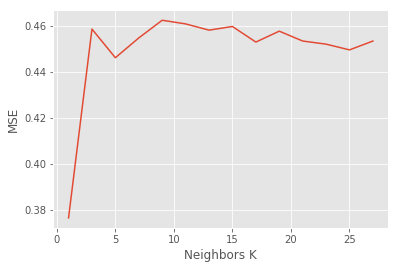

In [17]:
## Cross Validation
neighbors = np.array(range(1,15))
neighbors = neighbors*2 -1

cv_score = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='brute', metric='manhattan')
    scores = cross_val_score(knn, wine_X_train, wine_y_train, cv=4, scoring='accuracy')
    cv_score.append(scores.mean())
    
MSE = [1 - x for x in cv_score]
op_k = neighbors[MSE.index(min(MSE))]
print("Optimal number of neighbors:", op_k)

plt.plot(neighbors, MSE)
plt.xlabel('Neighbors K')
plt.ylabel('MSE')
plt.show()

In [18]:
knn = KNeighborsClassifier(n_neighbors=1, algorithm='brute', metric='manhattan')
knn.fit(wine_X_train,wine_y_train)
wine_y_pred = knn.predict(wine_X_test)
print("Confusion Matrix: \n", confusion_matrix(wine_y_test, wine_y_pred, labels=[3,4,5,6,7,8,9]))
print("\nAccuracy: ", accuracy_score(wine_y_test, wine_y_pred))

Confusion Matrix: 
 [[  0   0   1   1   0   0   0]
 [  0   6   4   4   0   0   0]
 [  0   4 104  42   6   0   0]
 [  1   2  29 155  21   5   0]
 [  0   0   5  31  49   4   0]
 [  0   0   0   4   7   4   0]
 [  0   0   1   0   0   0   0]]

Accuracy:  0.648979591837


### kNN_LSeuc

In [16]:
## Linear Search euclidean
s_time2 = time.time()
knn_LSelu.fit(wine_X_train,wine_y_train)
e_time2 = time.time() - s_time2

s_time22 = time.time()
wine_y_pred = knn_LSelu.predict(wine_X_test)
e_time22 = time.time() - s_time22

#print(np.unique(wine_y_test))
#print(np.unique(wine_y_pred))
print("Confusion Matrix: \n", confusion_matrix(wine_y_test, wine_y_pred, labels=[3,4,5,6,7,8,9]))
print("\nAccuracy: ",accuracy_score(wine_y_test, wine_y_pred))

Confusion Matrix: 
 [[  0   0   1   1   0   0   0]
 [  0   0   9   5   0   0   0]
 [  0   0  79  76   1   0   0]
 [  0   0  36 165  12   0   0]
 [  0   0   1  63  25   0   0]
 [  0   0   0  11   4   0   0]
 [  0   0   0   1   0   0   0]]

Accuracy:  0.548979591837


In [20]:
## Resubstitution Validation
knn_LSelu.fit(wine_np_X,wine_np_y)
wine_y_pred = knn_LSelu.predict(wine_X_test)
print("Confusion Matrix: \n", confusion_matrix(wine_y_test, wine_y_pred, labels=[3,4,5,6,7,8,9]))
print("\nAccuracy: ",accuracy_score(wine_y_test, wine_y_pred))

Confusion Matrix: 
 [[  0   0   1   1   0   0   0]
 [  0   0   8   6   0   0   0]
 [  0   0  85  70   1   0   0]
 [  0   0  32 171  10   0   0]
 [  0   0   1  60  28   0   0]
 [  0   0   0   8   7   0   0]
 [  0   0   0   1   0   0   0]]

Accuracy:  0.579591836735


Optimal number of neighbors: 1


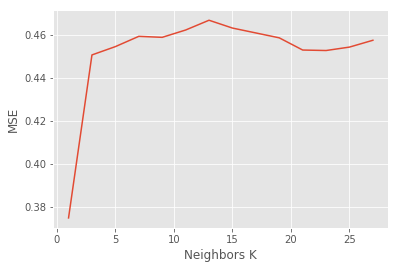

In [21]:
## Cross Validation
neighbors = np.array(range(1,15))
neighbors = neighbors*2 -1

cv_score = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='brute', metric='euclidean')
    scores = cross_val_score(knn, wine_X_train, wine_y_train, cv=4, scoring='accuracy')
    cv_score.append(scores.mean())
    
MSE = [1 - x for x in cv_score]
op_k = neighbors[MSE.index(min(MSE))]
print("Optimal number of neighbors:", op_k)

plt.plot(neighbors, MSE)
plt.xlabel('Neighbors K')
plt.ylabel('MSE')
plt.show()

In [22]:
knn = KNeighborsClassifier(n_neighbors=1, algorithm='brute', metric='euclidean')
knn.fit(wine_X_train,wine_y_train)
wine_y_pred = knn.predict(wine_X_test)
print("Confusion Matrix: \n", confusion_matrix(wine_y_test, wine_y_pred, labels=[3,4,5,6,7,8,9]))
print("\nAccuracy: ", accuracy_score(wine_y_test, wine_y_pred))

Confusion Matrix: 
 [[  0   1   0   1   0   0   0]
 [  0   5   6   2   0   1   0]
 [  0   6 100  47   3   0   0]
 [  0   1  35 151  24   2   0]
 [  0   0   6  32  47   4   0]
 [  0   0   0   5   5   5   0]
 [  0   0   1   0   0   0   0]]

Accuracy:  0.628571428571


### kNN_LScos

In [17]:
## Linear Search cosine distance
s_time3 = time.time()
knn_LScos.fit(wine_X_train,wine_y_train)
e_time3 = time.time() - s_time3

s_time33 = time.time()
wine_y_pred = knn_LScos.predict(wine_X_test)
e_time33 = time.time() - s_time33
#print(np.unique(wine_y_test))
#print(np.unique(wine_y_pred))
print("Confusion Matrix: \n", confusion_matrix(wine_y_test, wine_y_pred, labels=[3,4,5,6,7,8,9]))
print("\nAccuracy: ",accuracy_score(wine_y_test, wine_y_pred))

Confusion Matrix: 
 [[  0   0   2   0   0   0   0]
 [  0   0   9   5   0   0   0]
 [  0   0  78  74   4   0   0]
 [  0   0  33 167  13   0   0]
 [  0   0   0  63  26   0   0]
 [  0   0   0  13   2   0   0]
 [  0   0   0   1   0   0   0]]

Accuracy:  0.55306122449


In [24]:
## Resubstitution Validation
knn_LScos.fit(wine_np_X,wine_np_y)
wine_y_pred = knn_LScos.predict(wine_X_test)
print("Confusion Matrix: \n", confusion_matrix(wine_y_test, wine_y_pred, labels=[3,4,5,6,7,8,9]))
print("\nAccuracy: ",accuracy_score(wine_y_test, wine_y_pred))

Confusion Matrix: 
 [[  0   0   2   0   0   0   0]
 [  0   0   9   4   1   0   0]
 [  0   0  83  70   3   0   0]
 [  0   0  32 167  14   0   0]
 [  0   0   1  63  25   0   0]
 [  0   0   0  13   2   0   0]
 [  0   0   0   1   0   0   0]]

Accuracy:  0.561224489796


Optimal number of neighbors: 1


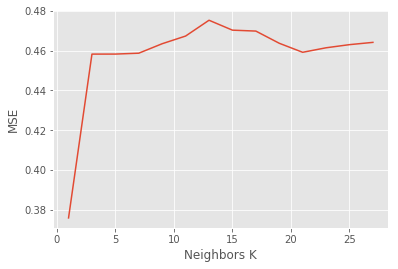

In [25]:
## Cross Validation
neighbors = np.array(range(1,15))
neighbors = neighbors*2 -1

cv_score = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='brute', metric=cosdist)
    scores = cross_val_score(knn, wine_X_train, wine_y_train, cv=4, scoring='accuracy')
    cv_score.append(scores.mean())
    
MSE = [1 - x for x in cv_score]
op_k = neighbors[MSE.index(min(MSE))]
print("Optimal number of neighbors:", op_k)

plt.plot(neighbors, MSE)
plt.xlabel('Neighbors K')
plt.ylabel('MSE')
plt.show()

In [26]:
knn = KNeighborsClassifier(n_neighbors=1, algorithm='brute', metric=cosdist)
knn.fit(wine_X_train,wine_y_train)
wine_y_pred = knn.predict(wine_X_test)
print("Confusion Matrix: \n", confusion_matrix(wine_y_test, wine_y_pred, labels=[3,4,5,6,7,8,9]))
print("\nAccuracy: ", accuracy_score(wine_y_test, wine_y_pred))

Confusion Matrix: 
 [[  0   1   0   1   0   0   0]
 [  0   5   5   3   0   1   0]
 [  0   8  96  48   4   0   0]
 [  1   1  31 153  23   4   0]
 [  0   0   6  28  49   6   0]
 [  0   0   0   4   6   5   0]
 [  0   0   0   0   1   0   0]]

Accuracy:  0.628571428571


# KD-Tree

### KDman

In [18]:
## KD-Tree manhattan
s_time4 = time.time()
knn_KDman.fit(wine_X_train,wine_y_train)
e_time4 = time.time() - s_time4

s_time44 = time.time()
wine_y_pred = knn_KDman.predict(wine_X_test)
e_time44 = time.time() - s_time44
#print(np.unique(wine_y_test))
#print(np.unique(wine_y_pred))
print("Confusion Matrix: \n", confusion_matrix(wine_y_test, wine_y_pred, labels=[3,4,5,6,7,8,9]))
print("\nAccuracy: ",accuracy_score(wine_y_test, wine_y_pred))

Confusion Matrix: 
 [[  0   0   0   2   0   0   0]
 [  0   0   9   5   0   0   0]
 [  0   0  82  71   3   0   0]
 [  0   0  35 165  13   0   0]
 [  0   0   2  62  25   0   0]
 [  0   0   0  10   5   0   0]
 [  0   0   0   1   0   0   0]]

Accuracy:  0.555102040816


In [16]:
## Resubstitution Validation
knn_KDman.fit(wine_np_X,wine_np_y)
wine_y_pred = knn_KDman.predict(wine_X_test)
print("Confusion Matrix: \n", confusion_matrix(wine_y_test, wine_y_pred, labels=[3,4,5,6,7,8,9]))
print("\nAccuracy: ",accuracy_score(wine_y_test, wine_y_pred))

Confusion Matrix: 
 [[  0   0   0   2   0   0   0]
 [  0   0   9   5   0   0   0]
 [  0   0  86  68   2   0   0]
 [  0   0  31 172  10   0   0]
 [  0   0   1  61  27   0   0]
 [  0   0   0  10   5   0   0]
 [  0   0   0   1   0   0   0]]

Accuracy:  0.581632653061


Optimal number of neighbors: 1


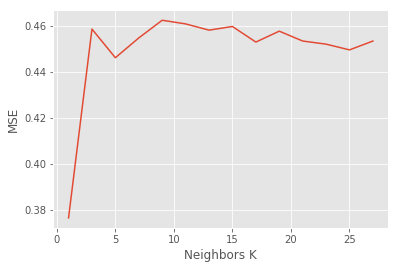

Confusion Matrix: 
 [[  0   0   1   1   0   0   0]
 [  0   6   4   4   0   0   0]
 [  0   4 104  42   6   0   0]
 [  1   2  29 155  21   5   0]
 [  0   0   5  31  49   4   0]
 [  0   0   0   4   7   4   0]
 [  0   0   1   0   0   0   0]]

Accuracy:  0.648979591837


In [17]:
## Cross Validation
neighbors = np.array(range(1,15))
neighbors = neighbors*2 -1

cv_score = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='kd_tree', metric='manhattan')
    scores = cross_val_score(knn, wine_X_train, wine_y_train, cv=4, scoring='accuracy')
    cv_score.append(scores.mean())
    
MSE = [1 - x for x in cv_score]
op_k = neighbors[MSE.index(min(MSE))]
print("Optimal number of neighbors:", op_k)

plt.plot(neighbors, MSE)
plt.xlabel('Neighbors K')
plt.ylabel('MSE')
plt.show()

knn = KNeighborsClassifier(n_neighbors=1, algorithm='kd_tree', metric='manhattan')
knn.fit(wine_X_train,wine_y_train)
wine_y_pred = knn.predict(wine_X_test)
print("Confusion Matrix: \n", confusion_matrix(wine_y_test, wine_y_pred, labels=[3,4,5,6,7,8,9]))
print("\nAccuracy: ", accuracy_score(wine_y_test, wine_y_pred))

### KD euc

In [19]:
## KD-Tree euclidean 
s_time5 = time.time()
knn_KDelu.fit(wine_X_train,wine_y_train)
e_time5 = time.time() - s_time5

s_time55 = time.time()
wine_y_pred = knn_KDelu.predict(wine_X_test)
e_time55 = time.time() - s_time55
#print(np.unique(wine_y_test))
#print(np.unique(wine_y_pred))
print("Confusion Matrix: \n", confusion_matrix(wine_y_test, wine_y_pred, labels=[3,4,5,6,7,8,9]))
print("\nAccuracy: ",accuracy_score(wine_y_test, wine_y_pred))

Confusion Matrix: 
 [[  0   0   1   1   0   0   0]
 [  0   0   9   5   0   0   0]
 [  0   0  79  76   1   0   0]
 [  0   0  36 165  12   0   0]
 [  0   0   1  63  25   0   0]
 [  0   0   0  11   4   0   0]
 [  0   0   0   1   0   0   0]]

Accuracy:  0.548979591837


In [19]:
## Resubstitution Validation
knn_KDelu.fit(wine_np_X,wine_np_y)
wine_y_pred = knn_KDelu.predict(wine_X_test)
print("Confusion Matrix: \n", confusion_matrix(wine_y_test, wine_y_pred, labels=[3,4,5,6,7,8,9]))
print("\nAccuracy: ",accuracy_score(wine_y_test, wine_y_pred))

Confusion Matrix: 
 [[  0   0   1   1   0   0   0]
 [  0   0   8   6   0   0   0]
 [  0   0  85  70   1   0   0]
 [  0   0  32 171  10   0   0]
 [  0   0   1  60  28   0   0]
 [  0   0   0   8   7   0   0]
 [  0   0   0   1   0   0   0]]

Accuracy:  0.579591836735


Optimal number of neighbors: 1


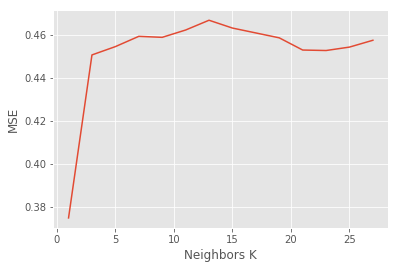

Confusion Matrix: 
 [[  0   1   0   1   0   0   0]
 [  0   5   6   2   0   1   0]
 [  0   6 100  47   3   0   0]
 [  0   1  35 151  24   2   0]
 [  0   0   6  32  47   4   0]
 [  0   0   0   5   5   5   0]
 [  0   0   1   0   0   0   0]]

Accuracy:  0.628571428571


In [20]:
## Cross Validation
neighbors = np.array(range(1,15))
neighbors = neighbors*2 -1

cv_score = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='kd_tree', metric='euclidean')
    scores = cross_val_score(knn, wine_X_train, wine_y_train, cv=4, scoring='accuracy')
    cv_score.append(scores.mean())
    
MSE = [1 - x for x in cv_score]
op_k = neighbors[MSE.index(min(MSE))]
print("Optimal number of neighbors:", op_k)

plt.plot(neighbors, MSE)
plt.xlabel('Neighbors K')
plt.ylabel('MSE')
plt.show()

knn = KNeighborsClassifier(n_neighbors=1, algorithm='kd_tree', metric='euclidean')
knn.fit(wine_X_train,wine_y_train)
wine_y_pred = knn.predict(wine_X_test)
print("Confusion Matrix: \n", confusion_matrix(wine_y_test, wine_y_pred, labels=[3,4,5,6,7,8,9]))
print("\nAccuracy: ", accuracy_score(wine_y_test, wine_y_pred))

# Elapsed Time

In [20]:
print("LSman:",e_time1, "\n     ", e_time11)
print("LSeuc:",e_time2, "\n     ", e_time22)
print("LScos:",e_time3, "\n     ", e_time33)
print("KDman:",e_time4, "\n     ", e_time44)
print("KDeuc:",e_time5, "\n     ", e_time55)

LSman: 0.0008192062377929688 
      0.07877159118652344
LSeuc: 0.0008454322814941406 
      0.11391854286193848
LScos: 0.0005743503570556641 
      39.99492168426514
KDman: 0.0022830963134765625 
      0.04935932159423828
KDeuc: 0.002869844436645508 
      0.03769540786743164
